In [2]:
import matplotlib.pyplot as plt

import Framework.Confounder_Injection as CI
import Framework.Models as Models
import importlib
importlib.reload(Models)
importlib.reload(CI)
import torch
import numpy as np
import seaborn as sbs
import matplotlib.pyplot as plt
from IPython.display import Latex
import Framework.Confounder_Injection as CI
import pandas as pd
import cv2

In [3]:
params = [
    [[1, 4], [3, 6]], # real feature
    [[10, 12], [20, 22]] # confounder
]


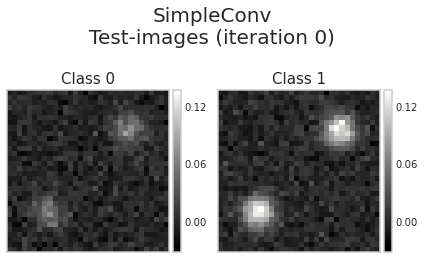

In [4]:
c = CI.confounder()
model = Models.SimpleConv()
samples = 1024
c.generate_data(mode="br_net", samples=512, test_samples=samples, train_confounding=1, test_confounding=[0], de_correlate_confounder_test=False, params=params)
c.model = model
c.plot(accuracy_vs_epoch=False, test_images=True, saliency=False, smoothgrad=False)
arr = c.test_x[0]

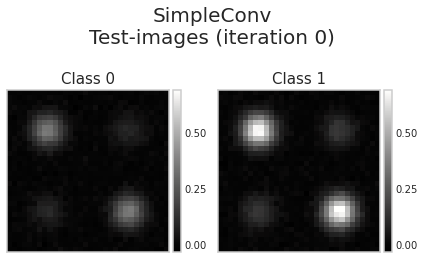

In [5]:
c_conf = CI.confounder()
model = Models.SimpleConv()
samples = 1024
c_conf.generate_data(mode="br_net", samples=512, test_samples=samples, train_confounding=1, test_confounding=[1], de_correlate_confounder_test=False, params=params)
c_conf.model = model
c_conf.plot(accuracy_vs_epoch=False, test_images=True, saliency=False, smoothgrad=False)
arr_conf = c_conf.test_x[0]

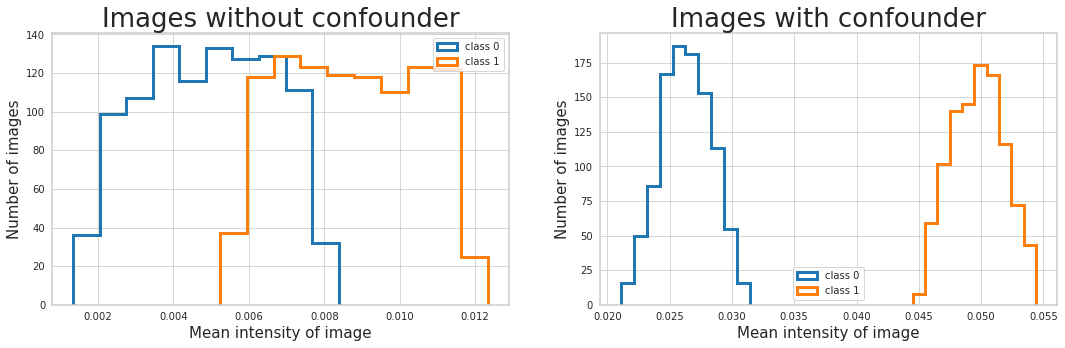

(1024, 1)


In [18]:
bins = 10
class_1 = np.mean(arr[:samples], axis=(2,3))
#class_1 = arr[:samples]
class_2 = np.mean(arr[samples:], axis=(2,3))
#class_2 = arr[samples:]
class_1_conf = np.mean(arr_conf[:samples], axis=(2,3))
class_2_conf = np.mean(arr_conf[samples:], axis=(2,3))
fig, ax = plt.subplots(1,2, figsize=(18,5))
ax[0].hist(class_1.ravel(), bins=bins, histtype="step", label="class 0", linewidth=3)
ax[0].hist(class_2.ravel(), bins=bins, histtype="step", label="class 1", linewidth=3)
ax[1].hist(class_1_conf.ravel(), bins=bins, histtype="step", label="class 0", linewidth=3)
ax[1].hist(class_2_conf.ravel(), bins=bins, histtype="step", label="class 1", linewidth=3)
ax[0].legend()
ax[1].legend()
ax[0].set_title("Images without confounder", fontsize=26)
ax[1].set_title("Images with confounder", fontsize=26)
for a in ax: a.set_xlabel("Mean intensity of image")
for a in ax: a.set_ylabel("Number of images")
plt.show()
print(class_1.shape)